**Module 3 Wine Dataset EDA and Regression**

**N Weissman, A Singh**

**DAV 6150 - Data Science**

**Professor James Topor**

**Summer, 2022**

**DAV 6150 Module 3 Assignment** *Cleaning “Messy” Data* 

\*\*\* **You may work in small groups of no more than three (3) people for this Assignment  \*\*\*** 

This assignment requires the application of many of the data preparation concepts covered in the required readings for Module 3. Specifically, you will be exploring and “cleaning” a data set that suffers from a variety of data integrity + usability issues. The data set you will be using is comprised of information on more than 12,700 wines, with many of the attributes being related to the chemical composition of the wines. An overview of the data attributes is provided below: 



|**Data Set Attribute** |**Description** |
| - | - |
|INDEX |Unique ID |
|TARGET |Response Variable (indicates # of cases of wine sold) |
|AcidIndex |Measures total acidity of wine via a weighted average |
|Alcohol |Alcohol Content |
|Chlorides |Chloride content of the wine |
|CitricAcid |Citric Acid content of the wine |
|Density |Density of the wine |
|FixedAcidity |FixedAcidity of the wine |
|FreeSulfurDioxide |Sulfur Dioxide content of the wine |
|LabelAppeal |Subjective marketing score that indicates the appeal of the design of the label on the bottle |
|ResidualSugar |Residual sugar content of the wine |
|STARS |Wine rating as determined by experts (4 = excellent; 1 = Poor |
|Sulphates |Sulfate content of the wine |
|TotalSulfurDioxide |Total sulfur dioxide content of the wine |
|VolatileAcidity |Volatile acid content of the wine |
|pH |pH of the wine |
 

Once you are comfortable in your understanding of the various data attributes, get started on the assignment as follows: 

1) Load the provided M3\_Data.csv file to your DAV 6150 Github Repository.  
2) Then, using a Jupyter Notebook, read the data set from your Github repository and load it into a Pandas dataframe.  
3) Using your Python skills, perform exploratory data analysis (EDA) on all of the provided data attributes and document your findings. Your EDA writeup should include any insights you are able to derive from your statistical analysis of the attributes and the accompanying exploratory graphics you create (e.g., bar plots, box plots, histograms, line plots, etc.). It is up to you as the data science practitioner to decide how you go about your EDA, including selecting appropriate statistical metrics to be calculated 
\+ which types of exploratory graphics to make use of. You should also identify any and all potential data integrity issues (e.g., missing data values; invalid data values; etc.) as well as data distribution issues (e.g., severe skew that can potentially impede the training/performance of a machine learning model) and, based on your analysis, determine whether any data attributes might need to be transformed prior to being used within a machine learning model. Your goal should be to provide an EDA that is thorough and succinct without it being so detailed that a reader will lose interest in it.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

Analyzing a dataset, it makes sense to start off with a question we want to answer and then use data analytics to anwer that question.

In this dataset we can try to understand:
**"What variables can predict the success of a wine?"**

**For this project we will define "success" by how many bottles were sold**

In [2]:
filepath = 'https://raw.githubusercontent.com/codepharmer/AI-6150/main/M3_Data.csv'
wines_df = pd.read_csv(filepath).drop(columns=['Unnamed: 0'])
wines_df

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.160,0.98,54.2,0.567,NaN,268.0,0.99280,3.33,0.59,9.9,0,8,2.0
1,2,3,4.5,0.160,0.81,26.1,0.425,15.0,327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,4,5,7.1,2.640,0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,5,3,5.7,0.385,0.04,18.8,0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,6,4,8.0,0.330,1.26,9.4,NaN,167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12790,16120,0,5.0,0.790,2.01,5.0,0.043,17.0,101.0,1.01077,3.39,0.57,4.9,1,5,NaN
12791,16123,5,8.9,0.470,0.29,84.9,0.259,54.0,NaN,0.99518,4.46,1.20,NaN,-1,8,2.0
12792,16127,4,6.0,0.170,1.10,37.0,0.078,25.0,108.0,0.99076,3.25,NaN,12.3,0,6,2.0
12793,16128,3,7.7,0.320,0.12,NaN,0.029,26.0,274.0,0.99060,3.97,0.62,11.0,-1,6,2.0


In [3]:
wines_df.describe()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,8069.980305,3.029074,8.063251,0.641086,0.686315,23.367809,0.222559,106.679042,204.319120,0.994203,3.207628,0.846668,10.523778,-0.009066,7.772724,2.041755
std,4656.905107,1.926368,4.996119,0.555614,0.606005,24.945667,0.234288,108.102694,163.116881,0.026538,0.679687,0.655612,3.629154,0.891089,1.323926,0.902540
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.888090,0.480000,0.000000,0.000000,-2.000000,4.000000,1.000000
25%,4037.500000,2.000000,5.600000,0.250000,0.280000,3.600000,0.046000,28.000000,100.000000,0.987720,2.960000,0.430000,9.000000,-1.000000,7.000000,1.000000
50%,8110.000000,3.000000,7.000000,0.410000,0.440000,12.900000,0.098000,56.000000,154.000000,0.994490,3.200000,0.590000,10.400000,0.000000,8.000000,2.000000
75%,12106.500000,4.000000,9.800000,0.910000,0.970000,38.700000,0.368000,172.000000,262.000000,1.000515,3.470000,1.100000,12.400000,1.000000,8.000000,3.000000
max,16129.000000,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


**Target** - Response Variable (indicates # of cases of wine sold, should suggest popularity) 

***Note:*** *a standard case of wine in the US contains 12 (750 ml sized) bottles of wine*

**AcidIndex** -	Measures total acidity of wine via a weighted average

**Alcohol**	- Alcohol Content

**Chlorides** - Chloride content of the wine

**CitricAcid** -	Citric Acid content of the wine (contributes to flavor)

**Density**	- Density of the wine

**FixedAcidity** -	FixedAcidity of the wine (acids strongly affect can wine's flavor/taste)

**FreeSulfurDioxide** -	Sulfur Dioxide content of the wine

**LabelAppeal** - Subjective marketing score that indicates the appeal of the design of the label on the bottle 

**ResidualSugar** -	Residual sugar content of the wine (no, or low residual sugar likely means it is a dry wine)

**STARS** -	Wine rating as determined by experts (4 = excellent; 1 = Poor

**Sulphates** -	Sulfate content of the wine

**TotalSulfurDioxide**  -	Total sulfur dioxide content of the wine

**VolatileAcidity**	- Volatile acid content of the wine (contribute to the smell or taste of vinigar in wine)

**pH**	- pH of the win (will probably be multimodal, as red and white have different recommended PHs)

### Breakdown of data types
<pre>
INDEX :  nominal
TARGET :  discreet
FixedAcidity : continuous
VolatileAcidity :  continuous
CitricAcid :  continuous
ResidualSugar :  continuous
Chlorides :  continuous
FreeSulfurDioxide :  continuous
TotalSulfurDioxide :  continuous
Density : continuous 
pH :  continuous
Sulphates :  continuous
Alcohol :  continuous
LabelAppeal :  ordinal
AcidIndex :  continuous
STARS :  ordinal (maybe consider as nominal?)
</pre>

### Which columns are missing data and how much

In [24]:
# for col_name,col in wines_df.transpose().iterrows():
#     print(col_name,': ',len(col[col.isnull()]))
print(wines_df.isnull().sum())
print('Total missing:        %s '% wines_df.isnull().sum().sum())

INDEX                    0
TARGET                   0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
TotalSulfurDioxide     682
Density                  0
pH                     395
Sulphates             1210
Alcohol                653
LabelAppeal              0
AcidIndex                0
STARS                 3359
dtype: int64
Total missing:        8200 


### Breakdown of missing data
- total cols with missing data = 8
- 1 categorical ordinal
- 7 numeric discreet

### How much of our data is actually missing

In [67]:
print('precentage rows with missing data: %.2f ' %
    (len(wines_df[wines_df.isnull().any(axis=1)]["INDEX"])/len(wines_df["INDEX"])*100))

precentage rows with missing data: 49.70 


### Visualize missing data

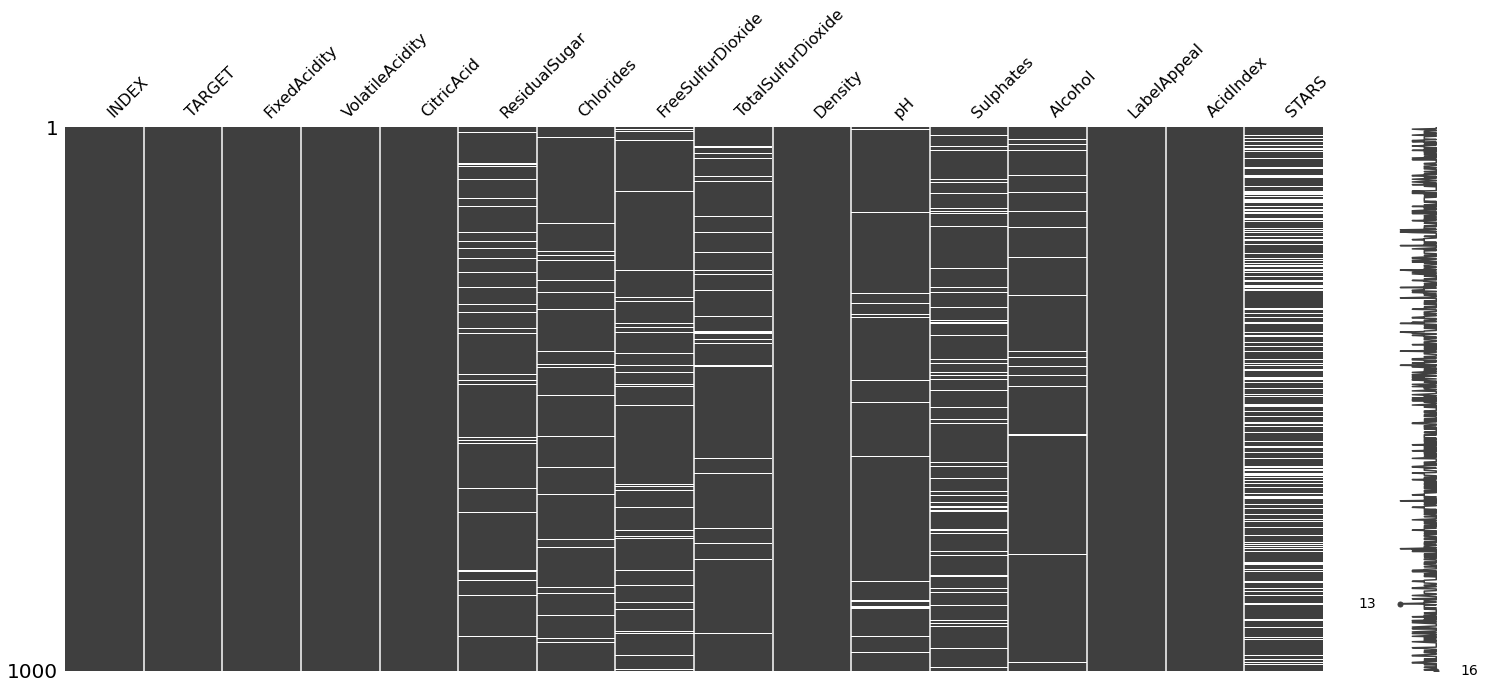

In [68]:
ax = msno.matrix(wines_df.sample(1000))
plt.show()

**The STARS column is clearly missing more than any onther column**

(confirming the numbers we saw above)

### Using a dendogram, we can get an idea how much data is missing from each field relative to the other fields

The key to interpereting a dendogram is to look at the height at which the objects are joined.


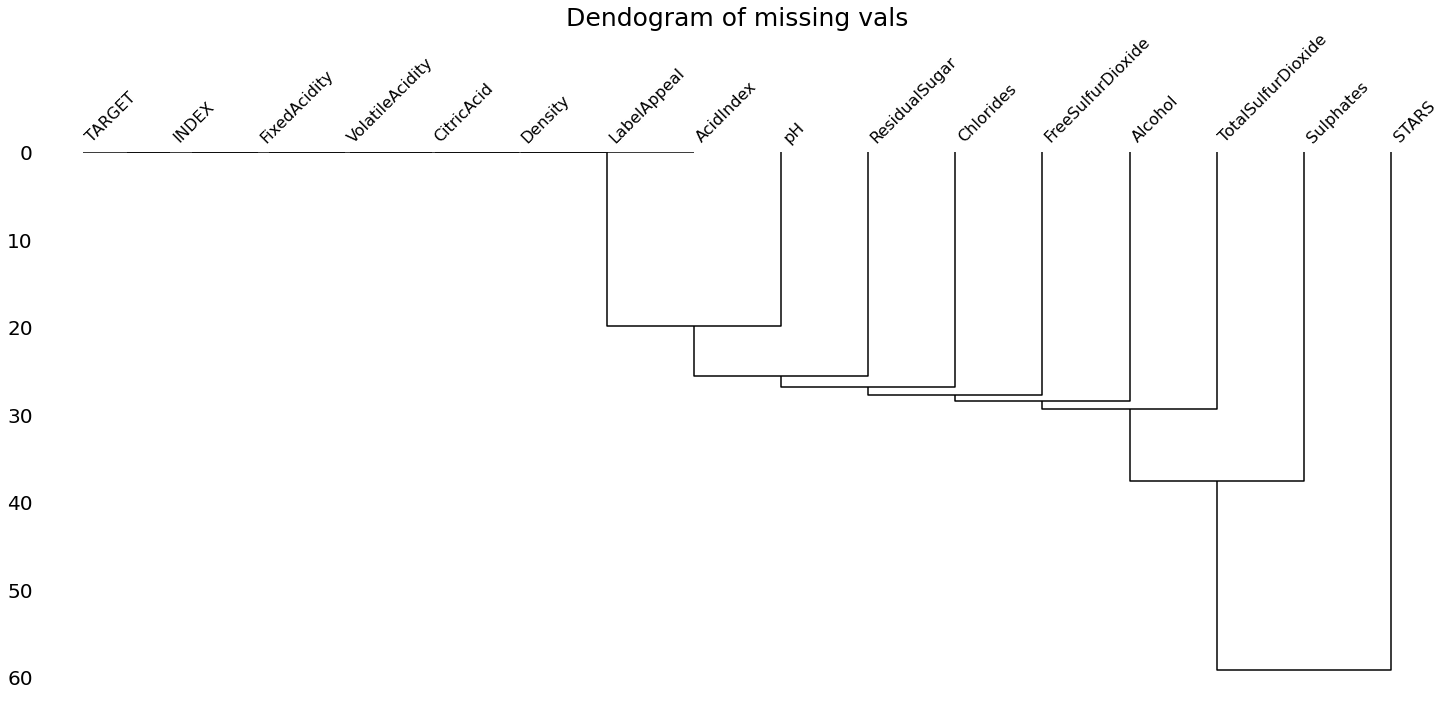

In [79]:
ax = msno.dendrogram(wines_df)
plt.title('Dendogram of missing vals', size=25)
plt.show()

### Below we create fields for to record columns/obs with missing values

In [61]:
affected_cols = [
    'ResidualSugar',
    'Chlorides',
    'FreeSulfurDioxide',
    'TotalSulfurDioxide',
    'Density',
    'pH',
    'Sulphates',
    'Alcohol',
    'STARS']
for col in affected_cols:
    wines_df[col+str('_NAN')] = pd.isna(wines_df[col])

wines_df

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,...,STARS,ResidualSugar_NAN,Chlorides_NAN,FreeSulfurDioxide_NAN,TotalSulfurDioxide_NAN,Density_NAN,pH_NAN,Sulphates_NAN,Alcohol_NAN,STARS_NAN
0,1,3,3.2,1.160,0.98,54.2,0.567,NaN,268.0,0.99280,...,2.0,False,False,True,False,False,False,False,False,False
1,2,3,4.5,0.160,0.81,26.1,0.425,15.0,327.0,1.02792,...,3.0,False,False,False,False,False,False,False,True,False
2,4,5,7.1,2.640,0.88,14.8,0.037,214.0,142.0,0.99518,...,3.0,False,False,False,False,False,False,False,False,False
3,5,3,5.7,0.385,0.04,18.8,0.425,22.0,115.0,0.99640,...,1.0,False,False,False,False,False,False,False,False,False
4,6,4,8.0,0.330,1.26,9.4,NaN,167.0,108.0,0.99457,...,2.0,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12790,16120,0,5.0,0.790,2.01,5.0,0.043,17.0,101.0,1.01077,...,NaN,False,False,False,False,False,False,False,False,True
12791,16123,5,8.9,0.470,0.29,84.9,0.259,54.0,NaN,0.99518,...,2.0,False,False,False,True,False,False,False,True,False
12792,16127,4,6.0,0.170,1.10,37.0,0.078,25.0,108.0,0.99076,...,2.0,False,False,False,False,False,False,True,False,False
12793,16128,3,7.7,0.320,0.12,NaN,0.029,26.0,274.0,0.99060,...,2.0,True,False,False,False,False,False,False,False,False


In [ ]:
# sorted([plt.hist((citric_acid.max()-citric_acid)/citric_acid.max())])
# plt.title('')
# plt.show()

In [58]:
wines_df.dtypes

INDEX                   int64
TARGET                  int64
FixedAcidity          float64
VolatileAcidity       float64
CitricAcid            float64
ResidualSugar         float64
Chlorides             float64
FreeSulfurDioxide     float64
TotalSulfurDioxide    float64
Density               float64
pH                    float64
Sulphates             float64
Alcohol               float64
LabelAppeal             int64
AcidIndex               int64
STARS                 float64
dtype: object

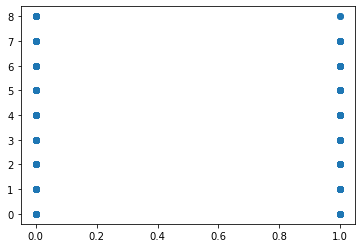

In [54]:
plt.scatter(wines_df['STARS_NAN'], wines_df['TARGET'])
plt.show()

#### Replace missing categorical data with a value called 'missing'

In [53]:
wines_df['STARS'] = wines_df['STARS'].fillna('MISSING')
len(wines_df['STARS'][wines_df['STARS'].isnull()])

0

### Maybe replace rtfi

4) Using your Python skills, perform appropriate data preparation tasks relative to the data integrity + usability issues you identified via your EDA work.  Describe the ways in which you have transformed / prepared the data for use within a machine learning algorithm, e.g., have you deleted any observations? Used imputation to fill missing data values? Created any new variables? Transformed data distributions via mathematical transforms (e.g., Box-Cox, logarithms, etc.) or binning to make the data more “usable” for model training? etc. Be sure to explain your justification for each adjustment you have made to the data. 

5) Using Python, re-run your EDA analysis on any variables you have adjusted during Data Preparation and compare / contrast your results to those you saw prior to performing your Data Preparation adjustments. Describe how each of your Data Preparation adjustments have improved the data set for purposes of using it within a machine learning algorithm. 

**Your deliverable for this assignment** is your Jupyter Notebook. It should contain a combination of Python code cells and explanatory narratives contained within properly formatted Markdown cells. The Notebook should contain (at a minimum) the following sections (including the relevant Python code for each section): 

1) **Introduction (5 Points)**:  Summarize the problem + explain the steps you plan to take to address the problem 
1) **Exploratory Data Analysis (35 Points)**: Explain + present your EDA work including any conclusions you draw from your analysis regarding the integrity + usability of the data in its raw state. This section should include any Python code used for the EDA 
1) **Data Preparation (45 Points)**: Describe + show the steps you have taken to address the data integrity + usability issues you identified in your EDA. This section should include any Python code used for Data Preparation 
1) **Prepped Data Review (10 Points)**: Explain + present your post-Data Prep EDA analysis. This section should include any Python code used for re-running your EDA on the variables adjusted during your Data Preparation work. 
1) **Conclusions (5 Points)** 

**Your deliverable should be similar to that of a publication-quality  / professional caliber document and should include clearly labeled graphics, high-quality formatting, clearly defined section and sub-section headers, and be free of spelling and grammar errors. Furthermore, your Pythion code should include succinct explanatory comments.**  

Upload your Jupyter Notebook within the provided M3 Assignment Canvas submission portal.  Be sure to save your Notebook using the nomenclature we‘ve been using, i.e.,  **first initial\_last name\_M3\_assn**" (e.g., J\_Smith\_M3\_assn\_).  ***Small groups should identity all group members at the start of the Jupyter Notebook and each team member should submit their own copy of the team’s work within Canvas.***